In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
X, y = housing.data, housing.target
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=11)

In [4]:
stand_scale = StandardScaler()

x_train_scale = stand_scale.fit_transform(X_train)
x_valid_scale = stand_scale.transform(X_valid)
x_test_scale = stand_scale.transform(X_test)

In [5]:
print(x_train_scale.shape, y_train.shape)
print(x_valid_scale.shape, y_test.shape)
print(x_test_scale.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (5160,)
(5160, 8) (3870,)


In [6]:
input_wide = keras.layers.Input(shape=(5))
input_deep = keras.layers.Input(shape=(6))

hidden1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_wide, hidden2])
output1 = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_wide, input_deep],
                   outputs=[output1, output2])
callbacks = [keras.callbacks.EarlyStopping(min_delta=1e-2, patience=5)]

In [7]:
model.compile(optimizer= keras.optimizers.SGD(0.001), loss="mse")

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
_______________________________________________________________________________________

In [9]:
x_train_scale_wide = x_train_scale[:, :5]
x_train_scale_deep = x_train_scale[:, 2:]
x_valid_scale_wide = x_valid_scale[:, :5]
x_valid_scale_deep = x_valid_scale[:, 2:]
x_test_scale_wide = x_test_scale[:, :5]
x_test_scale_deep = x_test_scale[:, 2:]

In [10]:
history = model.fit([x_train_scale_wide, x_train_scale_deep], [y_train, y_train], 
                    validation_data=([x_valid_scale_wide, x_valid_scale_deep], [y_valid, y_valid]), 
                    epochs=100, 
                    callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 4.0530 - dense_2_loss: 1.8361 - dense_3_loss: 2.2169 - val_loss: 2.4733 - val_dense_2_loss: 1.0021 - val_dense_3_loss: 1.4712
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 2.0636 - dense_2_loss: 0.8212 - dense_3_loss: 1.2424 - val_loss: 2.0113 - val_dense_2_loss: 0.7770 - val_dense_3_loss: 1.2342
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 1.7803 - dense_2_loss: 0.6856 - dense_3_loss: 1.0947 - val_loss: 1.7965 - val_dense_2_loss: 0.6983 - val_dense_3_loss: 1.0982
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 1.5900 - dense_2_loss: 0.6198 - dense_3_loss: 0.9702 - val_loss: 1.6122 - val_dense_2_loss: 0.6398 - val_dense_3_loss: 0.9724
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 1.4470 - dense_2_loss: 0.5795 - dense_3_loss: 0.8675 - val_loss: 1.4856 - val_dense_2_loss: 0.6060 - val_dense_3_loss: 0.

363/363 [==============================] - 1s 4ms/step - loss: 0.8674 - dense_2_loss: 0.3791 - dense_3_loss: 0.4883 - val_loss: 0.9185 - val_dense_2_loss: 0.3943 - val_dense_3_loss: 0.5242
Epoch 42/100
363/363 [==============================] - 1s 3ms/step - loss: 0.8623 - dense_2_loss: 0.3776 - dense_3_loss: 0.4847 - val_loss: 0.9005 - val_dense_2_loss: 0.3940 - val_dense_3_loss: 0.5065
Epoch 43/100
363/363 [==============================] - 1s 3ms/step - loss: 0.8570 - dense_2_loss: 0.3757 - dense_3_loss: 0.4813 - val_loss: 0.8973 - val_dense_2_loss: 0.3925 - val_dense_3_loss: 0.5048
Epoch 44/100
363/363 [==============================] - 1s 3ms/step - loss: 0.8496 - dense_2_loss: 0.3736 - dense_3_loss: 0.4760 - val_loss: 0.8971 - val_dense_2_loss: 0.3888 - val_dense_3_loss: 0.5083
Epoch 45/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8460 - dense_2_loss: 0.3725 - dense_3_loss: 0.4735 - val_loss: 0.8947 - val_dense_2_loss: 0.3965 - val_dense_3_loss: 0.4982
Epo

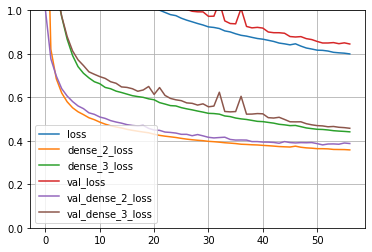

In [11]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(6,4))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [12]:
model.evaluate([x_test_scale_wide, x_test_scale_deep], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.8131 - dense_2_loss: 0.3699 - dense_3_loss: 0.4433


[0.8131380677223206, 0.3698509633541107, 0.44328683614730835]